**📦 1. Load necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph style
sns.set(style="whitegrid")


**📥 2. Load the dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**📊 3. Basic Info & Summary**

In [4]:
# Shape and column types
print("Dataset Shape:", df.shape)
df.info()

# Summary statistics
df.describe()


Dataset Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**🔍 4. Check for missing or unusual values**

In [5]:
# Null check
print("Missing values:\n", df.isnull().sum())

# Any zeroes that don't make sense? (e.g., 0 insulin or glucose?)
columns_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_with_zero:
    print(f"{col} - Number of zeros: {(df[col] == 0).sum()}")


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose - Number of zeros: 5
BloodPressure - Number of zeros: 35
SkinThickness - Number of zeros: 227
Insulin - Number of zeros: 374
BMI - Number of zeros: 11


📈 5. Visualize Distributions & Correlation

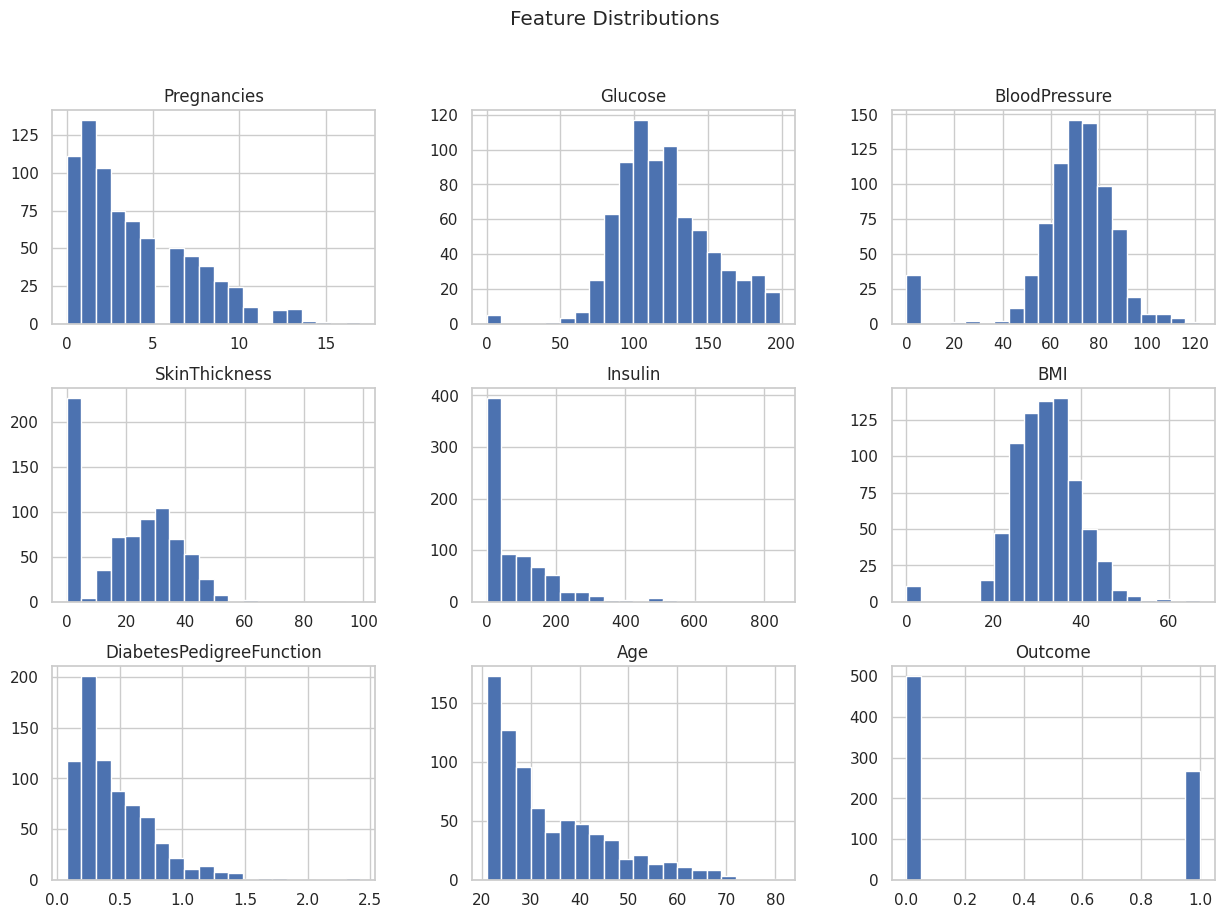

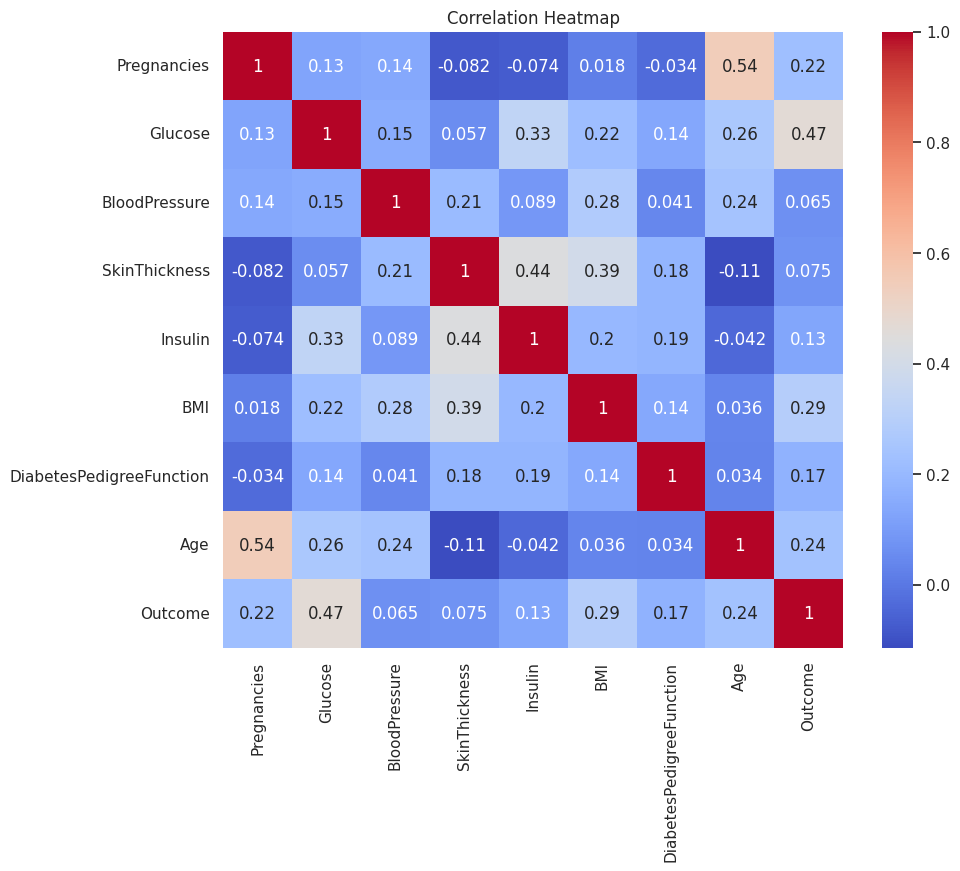

In [6]:
# Histogram for each feature
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**🧹 1. Replace 0s with NaN (for invalid columns)**

In [7]:
columns_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[columns_with_zero] = df[columns_with_zero].replace(0, np.nan)
df.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**🩹 2. Fill NaN with Median**

In [8]:
# Fill NaNs with median
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()  # Check again


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**📏 3. Feature Scaling using StandardScaler**

In [9]:
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**✅ 1. Train-Test Split**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


**🧠 2. Logistic Regression**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)


Logistic Regression Accuracy: 0.7532467532467533


**🌳 3. Decision Tree**

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)


Decision Tree Accuracy: 0.7142857142857143


**🌲 4. Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.7402597402597403


**📊 Bonus: Compare all models**

In [14]:
print("🔍 Model Comparison:")
print("Logistic Regression:", acc_lr)
print("Decision Tree:", acc_dt)
print("Random Forest:", acc_rf)


🔍 Model Comparison:
Logistic Regression: 0.7532467532467533
Decision Tree: 0.7142857142857143
Random Forest: 0.7402597402597403


# **Model Evaluation**

**📌 1. Confusion Matrix & Classification Report**

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
print("🔎 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n📃 Classification Report:\n", classification_report(y_test, y_pred_rf))


🔎 Confusion Matrix:
 [[78 21]
 [19 36]]

📃 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



**📌 2. Confusion Matrix Visualization**

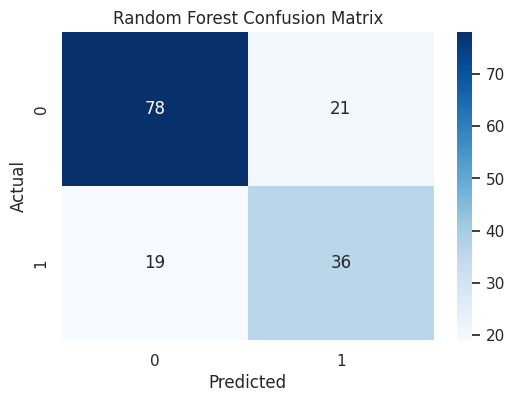

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**📌 3. ROC Curve**

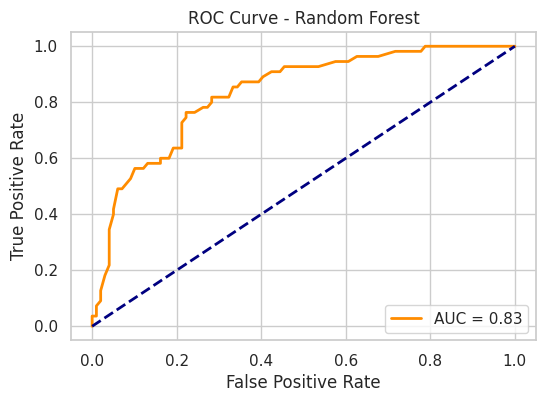

In [17]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label="AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


**📌 4. Feature Importance (for Random Forest)**

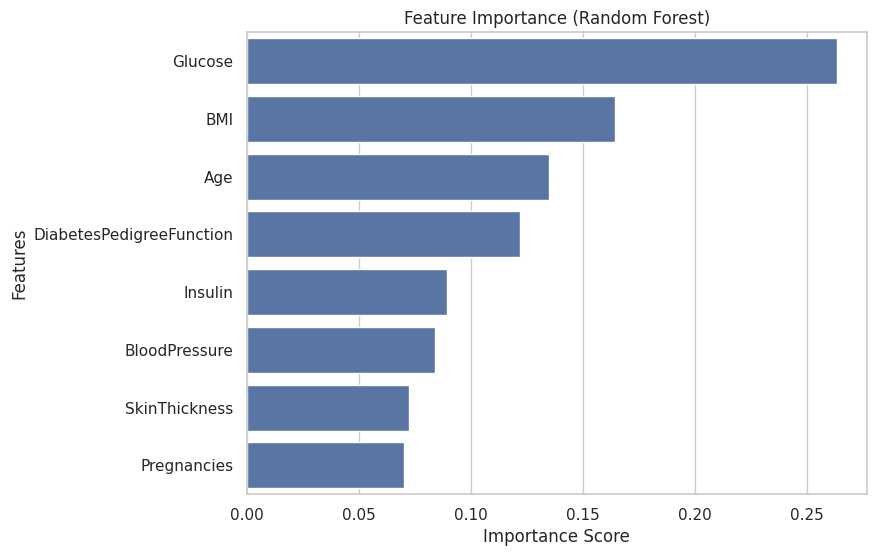

In [18]:
import pandas as pd

feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
